# ARIMA MODEL - DAILY CO2 DATASET 

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
co2 = pd.read_csv("co2_daily_mlo.csv")
co2.head()

,year,month,day,decimal_date,co2(ppm)
0,1974,5,19,1974.3781,333.46
1,1974,5,20,1974.3808,333.64
2,1974,5,21,1974.3836,333.50
3,1974,5,22,1974.3863,333.21
4,1974,5,23,1974.3890,333.05


In [4]:
co2.isna().sum()
co2.columns

Index(['year', 'month', 'day', 'decimal_date', 'co2(ppm)'], dtype='object')

In [5]:
co2 = co2.fillna(method='ffill')
print(co2.isna().sum())

year            0
month           0
day             0
decimal_date    0
co2(ppm)        0
dtype: int64


In [6]:
co2['Date'] = pd.to_datetime(co2[['year', 'month', 'day']])

In [7]:
co2 = co2.set_index('Date')

In [8]:
# co2.head()
co2.tail()

,year,month,day,decimal_date,co2(ppm)
Date,,,,,
2024-05-06,2024,5,6,2024.3443,425.80
2024-05-07,2024,5,7,2024.3470,425.76
2024-05-08,2024,5,8,2024.3497,426.85
2024-05-09,2024,5,9,2024.3525,427.68
2024-05-10,2024,5,10,2024.3552,427.74


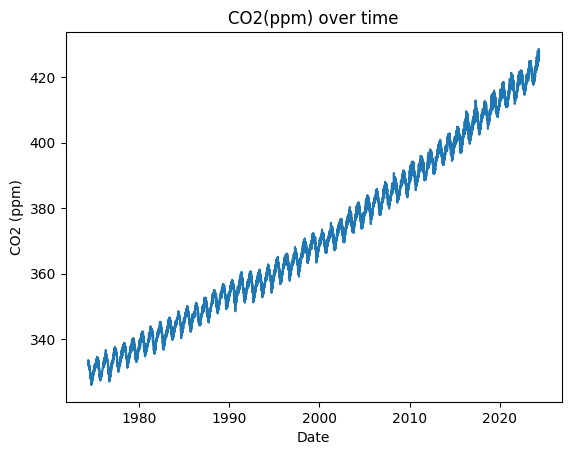

In [9]:
plt.plot(co2.index, co2['co2(ppm)'])
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.title('CO2(ppm) over time')
plt.show()

In [10]:
scaler = MinMaxScaler()
data = scaler.fit_transform(co2['co2(ppm)'].values.reshape(-1, 1))

In [12]:
X = co2.drop(columns=['co2(ppm)'])  # Assuming CO2_emissions is the target variable
y = co2['co2(ppm)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (12287, 4) (12287,)
Testing set shape: (3072, 4) (3072,)


In [92]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

check_stationarity(y_train)

ADF Statistic: -110.6915517765649
p-value: 0.0
Critical Values:
	1%: -3.430882367474913
	5%: -2.8617752795771736
	10%: -2.5668952343019873


In [93]:
data_diff = y_train.diff().dropna()
check_stationarity(data_diff)

ADF Statistic: -29.09538432099397
p-value: 0.0
Critical Values:
	1%: -3.4308841503777057
	5%: -2.861776067459439
	10%: -2.566895653687199


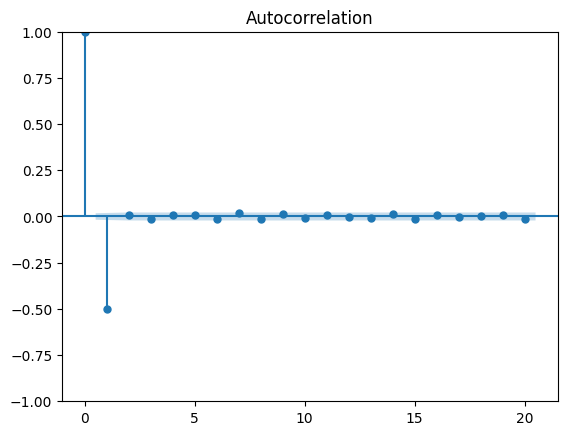

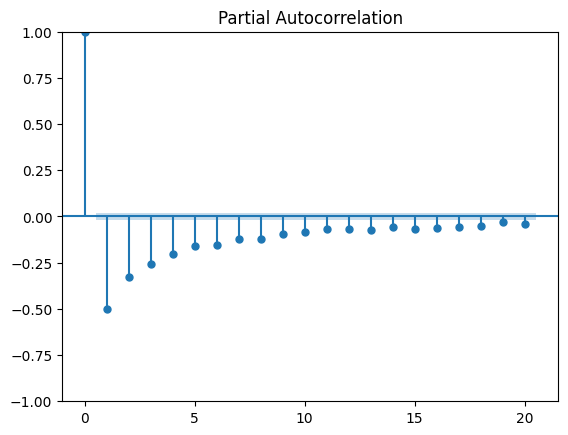

In [94]:
plot_acf(data_diff, lags=20)
plt.show()
plot_pacf(data_diff, lags=20)
plt.show()

In [95]:
p, d, q = 1, 1, 1
arima_model = ARIMA(y_train, order=(p, d, q))
arima_result = arima_model.fit()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has bee

                               SARIMAX Results                                
Dep. Variable:               co2(ppm)   No. Observations:                12287
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -57691.841
Date:                Sun, 12 May 2024   AIC                         115389.683
Time:                        13:52:39   BIC                         115411.931
Sample:                             0   HQIC                        115397.137
                              - 12287                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0013      0.009      0.144      0.885      -0.016       0.019
ma.L1         -0.9998      0.000  -3401.179      0.000      -1.000      -0.999
sigma2       701.3258     13.101     53.530      0.0

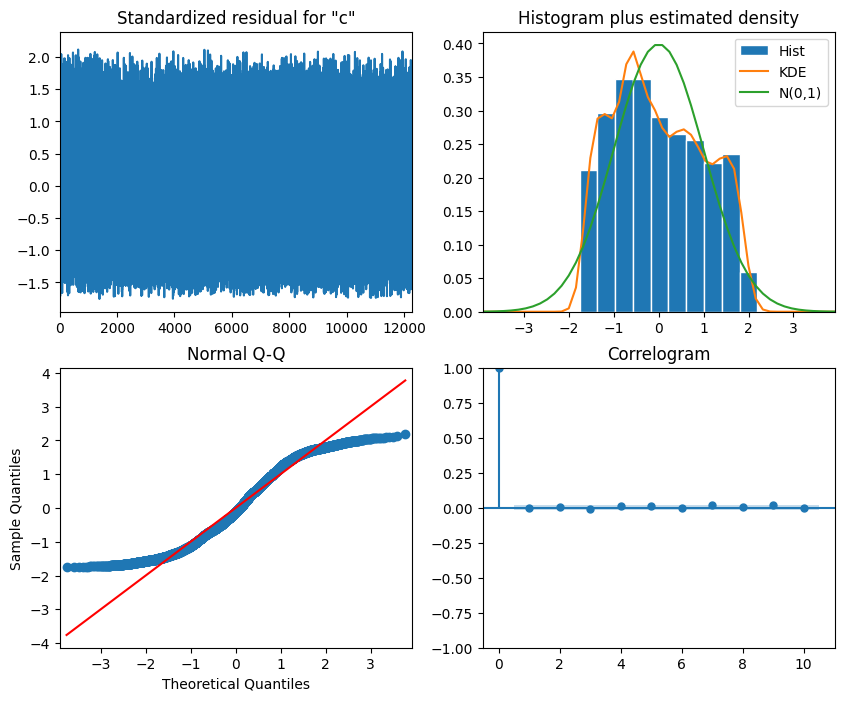

In [96]:
print(arima_result.summary())
arima_result.plot_diagnostics(figsize=(10, 8))
plt.show()

In [97]:
forecast_steps = 30  # or 31
forecast = arima_result.forecast(steps=forecast_steps)
print(forecast)

12287    373.101303
12288    373.105186
12289    373.105191
12290    373.105191
12291    373.105191
12292    373.105191
12293    373.105191
12294    373.105191
12295    373.105191
12296    373.105191
12297    373.105191
12298    373.105191
12299    373.105191
12300    373.105191
12301    373.105191
12302    373.105191
12303    373.105191
12304    373.105191
12305    373.105191
12306    373.105191
12307    373.105191
12308    373.105191
12309    373.105191
12310    373.105191
12311    373.105191
12312    373.105191
12313    373.105191
12314    373.105191
12315    373.105191
12316    373.105191
Name: predicted_mean, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [102]:
# Extract numerical values from y_test
y_test_values = y_test.values

# Align y_test_values and forecast by slicing to match lengths
y_test_values_aligned = y_test_values[:len(forecast)]

# Calculate accuracy
accuracy = 100 - np.mean(np.abs((y_test_values_aligned - forecast) / y_test_values_aligned)) * 100

print("Accuracy:", accuracy)

Accuracy: 94.34661940830313


In [101]:
start_date = pd.Timestamp('2024-01-01')

# Convert the time index to datetime format
forecast_dates = pd.date_range(start=start_date, periods=len(forecast), freq='D')

# Combine the forecast dates with the forecasted CO2 ppm values
forecast_df = pd.DataFrame({'DateTime': forecast_dates, 'CO2_ppm': forecast})

# Print the forecast DataFrame
print(forecast_df)

        DateTime     CO2_ppm
12287 2024-01-01  373.101303
12288 2024-01-02  373.105186
12289 2024-01-03  373.105191
12290 2024-01-04  373.105191
12291 2024-01-05  373.105191
12292 2024-01-06  373.105191
12293 2024-01-07  373.105191
12294 2024-01-08  373.105191
12295 2024-01-09  373.105191
12296 2024-01-10  373.105191
12297 2024-01-11  373.105191
12298 2024-01-12  373.105191
12299 2024-01-13  373.105191
12300 2024-01-14  373.105191
12301 2024-01-15  373.105191
12302 2024-01-16  373.105191
12303 2024-01-17  373.105191
12304 2024-01-18  373.105191
12305 2024-01-19  373.105191
12306 2024-01-20  373.105191
12307 2024-01-21  373.105191
12308 2024-01-22  373.105191
12309 2024-01-23  373.105191
12310 2024-01-24  373.105191
12311 2024-01-25  373.105191
12312 2024-01-26  373.105191
12313 2024-01-27  373.105191
12314 2024-01-28  373.105191
12315 2024-01-29  373.105191
12316 2024-01-30  373.105191


In [111]:
# Forecast for the same number of steps as the length of the testing set
forecast = arima_result.forecast(steps=len(y_test))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, forecast)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, forecast)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 694.11059316106
Mean Absolute Error (MAE): 22.55119993209355


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# ANN MODEL - CO2 DATASET

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', random_state=42)

# Train the model
ann_model.fit(X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)

In [15]:
y_pred = ann_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.6525927755352483
Mean Absolute Error (MAE): 0.6361620290335188


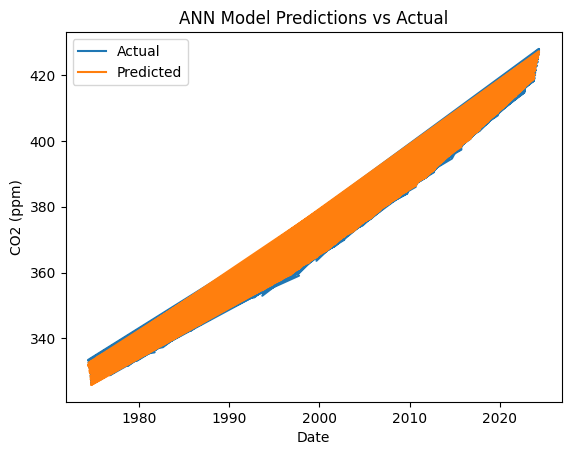

In [16]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.title('ANN Model Predictions vs Actual')
plt.legend()
plt.show()

In [21]:
# Generate dates for the next 30 days
last_date = pd.to_datetime(co2.index[-1])
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq='D')

# Reshape dates for prediction
next_dates_reshaped = next_dates.values.reshape(-1, 1)

# Scale the next_dates using the same scaler used for training data
next_dates_scaled = scaler.transform(next_dates_reshaped)

# Predict CO2 levels for the next 30 days
next_co2_levels = ann_model.predict(next_dates_scaled)

# Create a DataFrame for the forecasted CO2 levels
forecast_df = pd.DataFrame({'Date': next_dates, 'Forecasted CO2 (ppm)': next_co2_levels})

print(forecast_df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but StandardScaler is expecting 4 features as input.